# Conversion Report

step through each example

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import sys

try:
    import jose
except ModuleNotFoundError:
    print('jose not in PYTHONPATH, needs to be added')
    print('Attempting to add temporarily to demonstrate example functionality')
    sys.path.insert(1, os.path.join(os.getcwd(), 'PyJose'))
    import jose
    
from astropy.io import fits as pyfits

imageDir = os.path.join(os.getcwd(), 'PyJose', 'images')
dataDir = os.path.join(os.getcwd(), 'PyJose', 'data')
testDir = os.path.join(os.getcwd(), 'PyJose', 'jose', 'test', 'testData')
example1Dir = os.path.join(dataDir, 'example1')

jose not in PYTHONPATH, needs to be added
Attempting to add temporarily to demonstrate example functionality


In [2]:
# set up example 1
frame1 = pyfits.open(os.path.join(imageDir, 'ex1.fits'))[0]
Q = frame1.header.get('EPADU')
rn = frame1.header.get('RDNOISE') / Q
leftBound = 240
rightBound = 270
variance_image = np.abs(frame1.data) / Q + rn**2

### Polynomial Fitting

In [3]:
loadData = lambda filename: np.loadtxt('PyJose/data/procvect/' + filename + '.csv', delimiter=',')
idl_fittedData = loadData('bgRow')
data = loadData('datav')

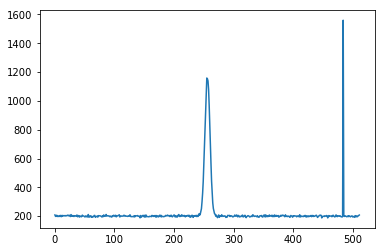

In [4]:
plt.plot(data)

### Background Fitting Comparison

In [5]:
background = jose.fit_background(frame1.data, (leftBound, rightBound), variance_image)

In [6]:
idl_background = np.loadtxt(os.path.join('PyJose/data/example1', 'bgim.csv'), delimiter=',')
difference_background = background - idl_background

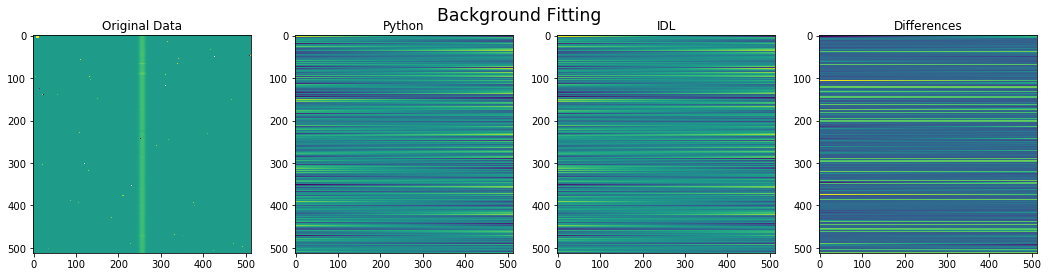

In [7]:
f, ax = plt.subplots(1,4, figsize=(18,4))

f.suptitle("Background Fitting", size='xx-large')

ax[0].imshow(frame1.data, norm=LogNorm())
ax[0].set_title('Original Data')
ax[1].imshow(background)
ax[1].set_title('Python')
ax[2].imshow(idl_background)
ax[2].set_title('IDL')
ax[3].imshow(difference_background)
ax[3].set_title('Differences')

### Profile Fitting

In [5]:
profileDir = os.path.join(testDir, 'fitprofData', 'test_00')

sky_background = np.loadtxt(os.path.join(profileDir, 'bgim.csv'), delimiter=',')
data = np.loadtxt(os.path.join(profileDir, 'dataim.csv'), delimiter=',')
variance = np.loadtxt(os.path.join(profileDir, 'varim.csv'), delimiter=',')

profile = jose.create_profile(data, sky_background, variance)

TypeError: expected non-empty vector for x

In [ ]:
profim = np.loadtxt(os.path.join(profileDir, 'profim.csv'), delimiter=',')

f, ax = plt.subplots(1,3, figsize=(18,4))
f.suptitle("Profile Fitting", size='xx-large')
ax[0].plot(optimal_spectrum)
ax[0].set_title('Python')

### Spectral Extraction

In [15]:
frame1 = pyfits.open(os.path.join(imageDir, 'ex1.fits'))[0]
Q = frame1.header.get('EPADU')
rn = frame1.header.get('RDNOISE') / Q
leftBound = 240
rightBound = 270
varim = np.abs(frame1.data) / Q + rn**2
optimal_spectrum = jose.optimal_extraction(frame1.data, varim, rn, Q, (leftBound, rightBound))

/mnt/e/Development/PyJose/jose/PyJose/jose/create_profile.py:21: RankWarning: Polyfit may be poorly conditioned
  w = 1 / variance[:,i][mask])
/mnt/e/Development/PyJose/jose/PyJose/jose/create_profile.py:21: RankWarning: Polyfit may be poorly conditioned
  w = 1 / variance[:,i][mask])
/mnt/e/Development/PyJose/jose/PyJose/jose/create_profile.py:21: RankWarning: Polyfit may be poorly conditioned
  w = 1 / variance[:,i][mask])
/mnt/e/Development/PyJose/jose/PyJose/jose/create_profile.py:21: RankWarning: Polyfit may be poorly conditioned
  w = 1 / variance[:,i][mask])
/mnt/e/Development/PyJose/jose/PyJose/jose/create_profile.py:21: RankWarning: Polyfit may be poorly conditioned
  w = 1 / variance[:,i][mask])


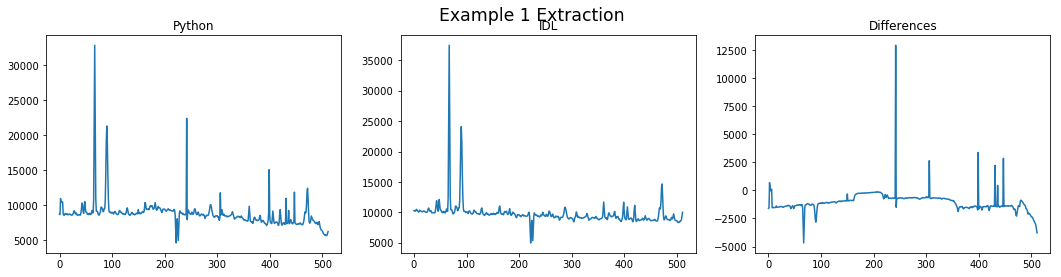

In [18]:
idl_spectrum = np.loadtxt('PyJose/data/example1/opspec1.csv')

f, ax = plt.subplots(1,3, figsize=(18,4))
f.suptitle("Example 1 Extraction", size='xx-large')
ax[0].plot(optimal_spectrum)
ax[0].set_title('Python')
ax[1].plot(idl_spectrum)
ax[1].set_title('IDL')
ax[2].plot(optimal_spectrum - idl_spectrum)
ax[2].set_title('Differences')